# **SNA PROJECT**
### **Title: Graph-Based Recommendation System for Tinder: Leveraging Social Interactions for Personalized Matches**

### **This project aims to address this challenge by developing a recommendation system for Tinder that leverages graph representation learning techniques. By modeling the social network of users as a graph and learning embeddings for users based on their interactions and connections, the system aims to generate more personalized and relevant match suggestions**

### **TEAM MEMBERS**
- ### **Jiya Thakur - 229309176**
- ### **Harshita Batta- 229309044**
- ### **Faaiz Hasib Mallick -229309195**
- ### **Pavni Jain- 229309039**


### **LIBRARIES**

In [2]:
!pip install --user node2vec


  Using cached node2vec-0.5.0-py3-none-any.whl (7.2 kB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Using cached FuzzyTM-2.0.9-py3-none-any.whl (31 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl (60 kB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached fst_pso-1.8.1-py3-none-any.whl
  Using cached simpful-2.12.0-py3-none-any.whl (24 kB)
  Using cached miniful-0.0.6-py3-none-any.whl


In [3]:
import ast
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import random
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

### **DATA COLLECTION**

In [30]:
USERS = pd.read_csv("C:/Users/ASUS/Downloads/users.csv")
SWIPES = pd.read_csv("C:/Users/ASUS/Downloads/swipes.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20260\3091330907.py:2: DtypeWarning: Columns (7,9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  SWIPES = pd.read_csv("C:/Users/ASUS/Downloads/swipes.csv")


In [31]:
USERS.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,is_verified,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,True,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,True,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,True,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,True,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,False,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN


In [6]:
SWIPES.head()

,id,first_like_unlike_at,first_msg,first_type,is_unmatch,like_count,p1,p1_extend_at,p2,p2_extend_at,second_like_unlike_at,second_msg,second_type,unmatch_on
0,0,2023-02-07T06:12:59.013Z,NaN,DISLIKE,False,2,2,NaN,0,NaN,2023-02-07T11:15:48.194Z,NaN,DISLIKE,NaN
1,1,2023-02-07T06:13:04.999Z,NaN,DISLIKE,False,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2,2023-02-07T06:13:10.206Z,NaN,DISLIKE,False,2,2,NaN,3,NaN,2023-02-07T11:58:49.136Z,NaN,LIKE,NaN
3,3,2023-02-07T07:10:01.566Z,NaN,DISLIKE,False,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,2023-02-07T07:10:04.391Z,NaN,DISLIKE,False,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN


In [7]:
USERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1403 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1403 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [8]:
SWIPES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     66622 non-null  int64 
 1   first_like_unlike_at   66622 non-null  object
 2   first_msg              169 non-null    object
 3   first_type             66622 non-null  object
 4   is_unmatch             66622 non-null  bool  
 5   like_count             66622 non-null  int64 
 6   p1                     66622 non-null  int64 
 7   p1_extend_at           102 non-null    object
 8   p2                     66622 non-null  int64 
 9   p2_extend_at           151 non-null    object
 10  second_like_unlike_at  4730 non-null   object
 11  second_msg             26 non-null     object
 12  second_type            4730 non-null   object
 13  unmatch_on             147 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 6.7+ MB


### **DATA PREPROCESSING**

**USERS DATA**

In [9]:
USERS.drop(columns=['height', 'is_subscribed', 'what_to_find', 'face_detection_probabilities', 'createdAt', 'dob', 'email',
                       'insta_username', 'is_habit_drink', 'is_habit_smoke', 'is_verified',
                       'mobile', 'status', 'type', 'updatedAt', 'verified_at', 'who_to_date'], inplace=True)

In [10]:
USERS.shape

(1405, 7)

In [11]:
USERS.dropna(inplace = True)
USERS.reset_index(inplace = True, drop = True)
USERS.shape

(1076, 7)

In [12]:
USERS['bio'] = USERS['bio'].str.replace(r'[^\w\s]', '').str.strip()

interests = []

for i in range(len(USERS)):
    try:
        USERS.loc[i, "college"] = ast.literal_eval(USERS.loc[i, "college"])[0]
    except Exception as e:
        USERS.loc[i, "college"] = None

    interests.append(ast.literal_eval(USERS.loc[i, "interests"]))

USERS["interests"] = interests

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20260\1195630500.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  USERS['bio'] = USERS['bio'].str.replace(r'[^\w\s]', '').str.strip()


In [13]:
USERS = USERS.dropna().reset_index(drop = True)

In [14]:
USERS.head()

,_id,bio,college,country,gender,interests,name
0,0,I am very honest and caring person,Jawaharlal Nehru University,IN,M,"[Art & Craft, Bollywood, Comedy, Design, Badmi...",Prakhar Sharma
1,1,Lets go on a date,Heritage,IN,M,"[Singing, Writing, Dancing, Mountains, Biryani]",Amit
2,2,Loving life,Jawaharlal Nehru University,IN,F,"[Badminton, Design, Writing, Open-Minded, Coffee]",Ritz
3,3,Jai Maharashtra\nBharat Mata ki Jay\nInquilab ...,Jawaharlal Nehru University,IN,M,"[Singing, Cricket, Concerts, Vegetarian, Tea]",Devesh Shukla
4,4,,Jawaharlal Nehru University,IN,M,"[Football, Gym, Biryani, Sci-fi, Cricket]",Aditya bhadoriya


**SWIPES DATA**

In [15]:
SWIPES.columns

Index(['id', 'first_like_unlike_at', 'first_msg', 'first_type', 'is_unmatch',
       'like_count', 'p1', 'p1_extend_at', 'p2', 'p2_extend_at',
       'second_like_unlike_at', 'second_msg', 'second_type', 'unmatch_on'],
      dtype='object')

In [16]:
SWIPES.drop(columns=['id', 'p1_extend_at', 'p2_extend_at', 'first_like_unlike_at',
                     'first_msg', 'is_unmatch', 'second_like_unlike_at', 'second_msg', 'unmatch_on'], inplace=True)
SWIPES = SWIPES[SWIPES.like_count == 2].reset_index(drop = True)
SWIPES.drop(columns = ['like_count'], inplace = True)

In [17]:
SWIPES.head()

,first_type,p1,p2,second_type
0,DISLIKE,2,0,DISLIKE
1,DISLIKE,2,3,LIKE
2,DISLIKE,4,2,DISLIKE
3,DISLIKE,6,2,DISLIKE
4,DISLIKE,8,2,DISLIKE


In [18]:
SWIPES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   first_type   4730 non-null   object
 1   p1           4730 non-null   int64 
 2   p2           4730 non-null   int64 
 3   second_type  4730 non-null   object
dtypes: int64(2), object(2)
memory usage: 147.9+ KB


In [19]:
users_ids = set(USERS["_id"])
SWIPES["is_p1"] = SWIPES["p1"].apply(lambda x: True if x in users_ids else False)
SWIPES["is_p2"] = SWIPES["p2"].apply(lambda x: True if x in users_ids else False)

In [20]:
SWIPES = SWIPES[(SWIPES["is_p1"]) & (SWIPES["is_p2"])].reset_index(drop = True)
SWIPES.drop(columns = ["is_p1", "is_p2"], inplace = True)
SWIPES

,first_type,p1,p2,second_type
0,DISLIKE,2,0,DISLIKE
1,DISLIKE,2,3,LIKE
2,DISLIKE,4,2,DISLIKE
3,DISLIKE,6,2,DISLIKE
4,DISLIKE,8,2,DISLIKE
...,...,...,...,...
4182,LIKE,899,1375,DISLIKE
4183,DISLIKE,1391,1238,DISLIKE
4184,LIKE,1291,1207,DISLIKE
4185,LIKE,1400,1210,DISLIKE


### **GRAPH CONSTRUCTION**

In [21]:
G = nx.DiGraph()

for index, row in USERS.iterrows():
    user_id = row['_id']
    user_attributes = row.drop('_id').to_dict()
    G.add_node(user_id, **user_attributes)

for index, row in SWIPES.iterrows():
    p1 = row['p1']
    p2 = row['p2']
    G.add_edge(p1, p2, interaction_type=row['first_type'])
    G.add_edge(p2, p1, interaction_type=row['second_type'])

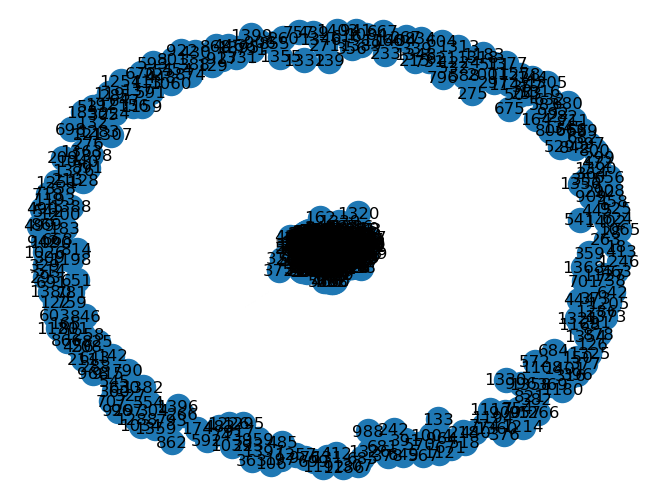

In [22]:
nx.draw(G, with_labels = True)
plt.show()

### **GRAPH REPRESENTATION LEARNING**

In [23]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/1073 [00:00<?, ?it/s]

In [24]:
node_embeddings = {}
for node in G.nodes():
    try:
        node_embeddings[node] = model.wv[node]
    except Exception as e:
        continue

In [25]:
users = list(node_embeddings.keys())

In [26]:
def recommend_similar_users(user_id, k=5):
    user_embedding = node_embeddings[user_id]
    similarities = {}
    for other_user_id in users:
        if other_user_id != user_id:
            other_user_embedding = node_embeddings[other_user_id]
            similarity = cosine_similarity([user_embedding], [other_user_embedding])[0][0]
            similarities[other_user_id] = similarity

    top_similar_users = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]
    return top_similar_users

In [27]:
user_id = random.choice(users)
top_similar_users = recommend_similar_users(user_id)
print(f"Top 5 similar users for user {user_id}:")
for i in top_similar_users:
    print(f"{i}")

Top 5 similar users for user 276:
(305, 0.7099102)
(670, 0.69654)
(696, 0.6617056)
(135, 0.6494054)
(502, 0.6470983)


In [28]:
USERS[USERS["_id"] == user_id].reset_index(drop = True)

,_id,bio,college,country,gender,interests,name
0,276,Big Mony Buy big boobz,Jawaharlal Nehru University,IN,M,[],Gaurav Kumar


In [29]:
RECOMMENDATIONS = pd.DataFrame(columns = USERS.columns)

for i, s in top_similar_users:
    RECOMMENDATIONS = pd.concat([RECOMMENDATIONS, USERS[USERS["_id"] == i]])

RECOMMENDATIONS.reset_index(drop = True)

,_id,bio,college,country,gender,interests,name
0,305,Same old same old,Jawaharlal Nehru University,IN,M,[],R
1,670,It remains to be revealed,Jawaharlal Nehru University,IN,M,"[Badminton, Writing, Dancing, Biryani, Tea]",Asish
2,696,Just a muggle lost in Hogwarts among pure blood,Jawaharlal Nehru University,IN,F,"[Singing, Art & Craft, Writing, Dancing, Design]",Nanshika
3,135,CIXOT,Jawaharlal Nehru University,IN,M,"[Photography, Badminton, Tea, Ambitions, Crime]",Tassawoor
4,502,I am happy mingling with different people,Jawaharlal Nehru University,IN,M,"[Photography, Singing, Writing, Cycling, Gym]",Frank


# ============================================================
# Social Network Analysis: Full Pipeline
# - Loads users.csv, swipes.csv (use the same folder as notebook)
# - Builds user graph (mutual-like edges)
# - Centrality plots: Betweenness, Closeness (with Top-K tables)
# - Similarity heatmap (Node2Vec cosine if available; else Jaccard)
# - Community plot (greedy modularity on GCC / k-core optional)
# - Supervised link prediction with confusion matrix + metrics
# ============================================================

Graph: |V|=1405 |E|=4730

Top 20 by Betweenness:
 11      0.124593
2       0.062380
1238    0.041653
7       0.040815
697     0.022835
831     0.019255
404     0.019200
354     0.011980
325     0.011576
160     0.009659
1098    0.009580
949     0.009267
1210    0.008741
519     0.008419
677     0.007741
650     0.007224
349     0.006269
1262    0.005642
939     0.005238
1375    0.004742
dtype: float64

Top 20 by Closeness (GCC):
 11      0.483535
7       0.475702
2       0.434418
1238    0.423965
916     0.415566
1162    0.414979
1114    0.414783
956     0.413227
1207    0.413033
973     0.411298
899     0.411106
1050    0.410723
972     0.410531
962     0.410340
1136    0.409006
1005    0.407682
1093    0.407116
979     0.406178
1160    0.405804
960     0.405430
dtype: float64


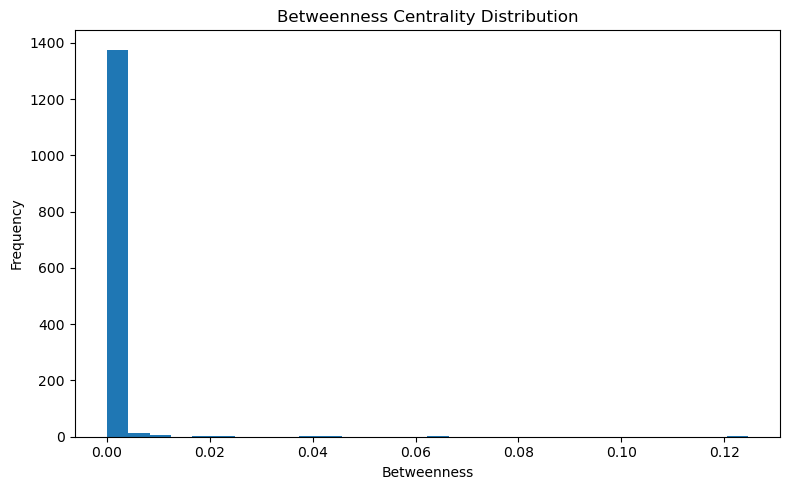

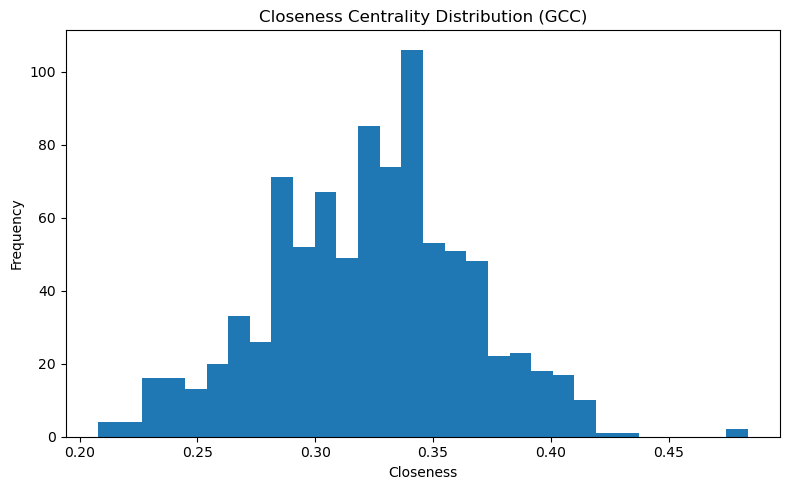

Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.89it/s]


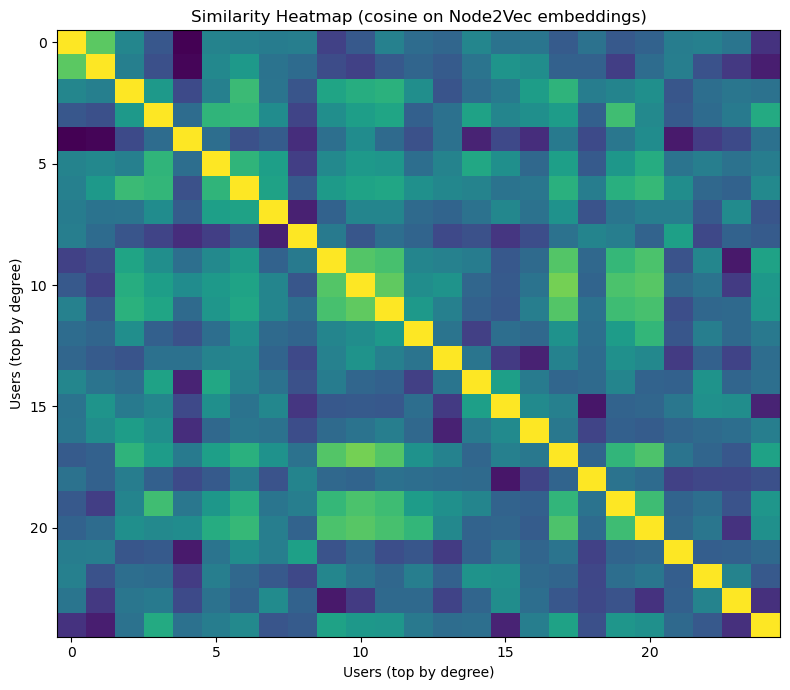

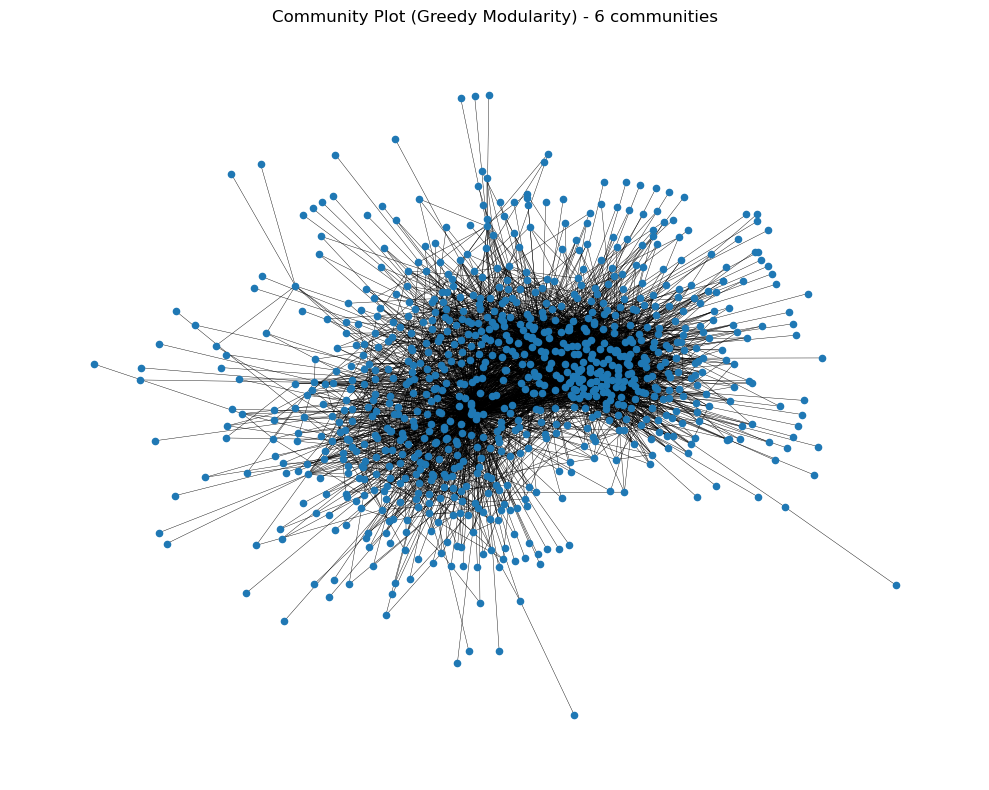


Split sizes -> train_pos=3028, val_pos=756, test_pos=946
               train_neg=3028, val_neg=756, test_neg=946


Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]

Best Node2Vec config (AP): {'dimensions': 64, 'walk_length': 20, 'num_walks': 80, 'p': 1.0, 'q': 1.0} AP= 0.9833


Computing transition probabilities:   0%|          | 0/1405 [00:00<?, ?it/s]


TEST METRICS (supervised link prediction)
ROC-AUC: 0.9217   PR-AUC: 0.9313
Accuracy: 0.8541   Precision: 0.8541   Recall: 0.8541   F1: 0.8541
Confusion Matrix [[TN FP],[FN TP]]:
 [[808 138]
 [138 808]]


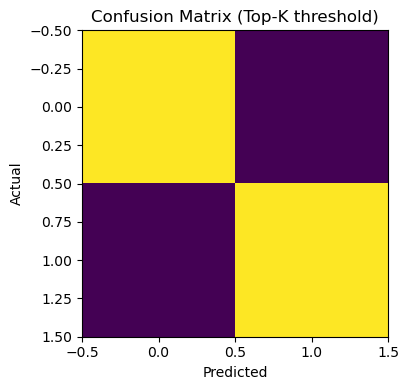

In [5]:


import math, random, warnings
from pathlib import Path

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, confusion_matrix,
    precision_recall_fscore_support, accuracy_score
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------- Config / Paths --------------------------
DATA_DIR = Path("C:/Users/ASUS/Downloads")  # put users.csv and swipes.csv next to the notebook
USERS_PATH  = DATA_DIR / "users.csv"
SWIPES_PATH = DATA_DIR / "swipes.csv"

# -------------------------- Load CSVs --------------------------
USERS  = pd.read_csv(USERS_PATH)
SWIPES = pd.read_csv(SWIPES_PATH, low_memory=False)

# -------------------------- Filter mutual likes + valid IDs --------------------------
if "like_count" in SWIPES.columns:
    SWIPES = SWIPES[SWIPES["like_count"] == 2].reset_index(drop=True)
    SWIPES.drop(columns=["like_count"], inplace=True)

uid_set = set(USERS["_id"])
must_cols = {"p1", "p2"}
if not must_cols.issubset(set(SWIPES.columns)):
    raise ValueError("swipes.csv must have 'p1' and 'p2' columns.")

SWIPES = SWIPES[SWIPES["p1"].isin(uid_set) & SWIPES["p2"].isin(uid_set)].reset_index(drop=True)

# -------------------------- Build Directed Graph --------------------------
G = nx.DiGraph()
for _, row in USERS.iterrows():
    uid = row["_id"]
    attrs = row.drop(labels=["_id"]).to_dict()
    G.add_node(uid, **attrs)

for _, row in SWIPES.iterrows():
    p1, p2 = row["p1"], row["p2"]
    G.add_edge(p1, p2, interaction_type=row.get("first_type", None))
    G.add_edge(p2, p1, interaction_type=row.get("second_type", None))

UG = G.to_undirected()
print(f"Graph: |V|={UG.number_of_nodes()} |E|={UG.number_of_edges()}")

# -------------------------- CENTRALITY PLOTS --------------------------
def plot_hist(values, title, xlabel):
    plt.figure(figsize=(8,5))
    plt.hist(values, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

num_nodes = UG.number_of_nodes()
k_sample = min(200, max(20, num_nodes // 5))  # approximate betweenness (faster)
try:
    betw = nx.betweenness_centrality(UG, k=k_sample, seed=42)
except Exception:
    betw = nx.betweenness_centrality(UG)

betw_s = pd.Series(betw).sort_values(ascending=False)
print("\nTop 20 by Betweenness:\n", betw_s.head(20))

# Closeness on Giant Component
if num_nodes > 0:
    components = sorted(nx.connected_components(UG), key=len, reverse=True)
    GCC_nodes = list(components[0])
    GCC = UG.subgraph(GCC_nodes).copy()
    close = nx.closeness_centrality(GCC)
    close_s = pd.Series(close).sort_values(ascending=False)
    print("\nTop 20 by Closeness (GCC):\n", close_s.head(20))
else:
    close_s = pd.Series(dtype=float)

plot_hist(list(betw_s.values), "Betweenness Centrality Distribution", "Betweenness")
if not close_s.empty:
    plot_hist(list(close_s.values), "Closeness Centrality Distribution (GCC)", "Closeness")

# -------------------------- SIMILARITY HEATMAP --------------------------
def try_node2vec_embeddings(graph):
    """Return dict node->vector if node2vec is available; else None."""
    try:
        from node2vec import Node2Vec
        node2vec = Node2Vec(graph, dimensions=32, walk_length=10, num_walks=20, workers=1)
        model = node2vec.fit(window=5, min_count=1)
        emb = {}
        for n in graph.nodes():
            k = str(n)
            if k in model.wv:
                emb[n] = model.wv[k]
        return emb
    except Exception as e:
        print(f"[info] Node2Vec not used ({e}). Falling back to Jaccard.")
        return None

def jaccard_sim(graph, u, v):
    Nu, Nv = set(graph.neighbors(u)), set(graph.neighbors(v))
    denom = len(Nu | Nv)
    return (len(Nu & Nv) / denom) if denom > 0 else 0.0

deg_s = pd.Series(dict(UG.degree())).sort_values(ascending=False)
small_set = list(deg_s.head(25).index) if len(deg_s) >= 25 else list(UG.nodes())[:min(25, len(UG))]

embeddings = try_node2vec_embeddings(UG)
if embeddings is not None and len(embeddings) >= len(small_set):
    sim_mat = np.zeros((len(small_set), len(small_set)))
    for i,u in enumerate(small_set):
        for j,v in enumerate(small_set):
            sim_mat[i,j] = 1.0 if i==j else cosine_similarity([embeddings[u]], [embeddings[v]])[0,0]
    title = "Similarity Heatmap (cosine on Node2Vec embeddings)"
else:
    sim_mat = np.zeros((len(small_set), len(small_set)))
    for i,u in enumerate(small_set):
        for j,v in enumerate(small_set):
            sim_mat[i,j] = 1.0 if i==j else jaccard_sim(UG, u, v)
    title = "Similarity Heatmap (Jaccard over neighbor sets)"

plt.figure(figsize=(8,7))
plt.imshow(sim_mat, interpolation="nearest", aspect="auto")
plt.title(title)
plt.xlabel("Users (top by degree)")
plt.ylabel("Users (top by degree)")
plt.tight_layout()
plt.show()

# -------------------------- COMMUNITY PLOT --------------------------
from networkx.algorithms.community import greedy_modularity_communities

# Work on GCC for clarity
if num_nodes > 0:
    comps = sorted(nx.connected_components(UG), key=len, reverse=True)
    H = UG.subgraph(list(comps[0])).copy()
    comms = list(greedy_modularity_communities(H))
    pos = nx.spring_layout(H, seed=42)

    plt.figure(figsize=(10,8))
    for c in comms:  # auto color cycle
        nx.draw_networkx_nodes(H, pos, nodelist=list(c), node_size=20)
    nx.draw_networkx_edges(H, pos, width=0.3)
    plt.title(f"Community Plot (Greedy Modularity) - {len(comms)} communities")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------------- SUPERVISED LINK PREDICTION --------------------------
# Robust split (temporal if possible; otherwise random)
def do_temporal_split(df, time_cols=("first_like_unlike_at","second_like_unlike_at","createdAt","updatedAt"),
                      train_frac=0.8, min_train=100):
    for tc in time_cols:
        if tc in df.columns:
            try:
                times = pd.to_numeric(df[tc], errors="coerce")
                tmp = df.assign(_t=times).dropna(subset=["_t"]).sort_values("_t").reset_index(drop=True)
                if len(tmp) >= (min_train + 10):
                    split_idx = int(train_frac * len(tmp))
                    tr = tmp.iloc[:split_idx][["p1","p2"]]
                    te = tmp.iloc[split_idx:][["p1","p2"]]
                    if len(tr) >= min_train and len(te) >= 10:
                        return tr, te
            except Exception:
                pass
    return None, None

train_edges_df, test_edges_df = do_temporal_split(SWIPES)
if (train_edges_df is None) or (test_edges_df is None):
    train_edges_df, test_edges_df = train_test_split(SWIPES[["p1","p2"]], test_size=0.2, random_state=42, shuffle=True)

train_edges = list(map(tuple, train_edges_df.values))
test_pos    = list(map(tuple, test_edges_df.values))

# Train graph
H_train = nx.Graph()
H_train.add_nodes_from(UG.nodes())
H_train.add_edges_from(train_edges)

# Negative sampling
def sample_non_edges(G, n, rng=random.Random(42), max_trials_factor=50):
    res, tried = [], 0
    nodes = list(G.nodes())
    existing = set(map(tuple, map(sorted, G.edges())))
    max_trials = max(1, n * max_trials_factor)
    while len(res) < n and tried < max_trials:
        u, v = rng.sample(nodes, 2)
        key = tuple(sorted((u, v)))
        if key not in existing:
            res.append((u, v))
        tried += 1
    return res

train_neg = sample_non_edges(H_train, len(train_edges))
test_neg  = sample_non_edges(UG,      len(test_pos))

# Safe small validation split
def safe_split(lst, test_frac=0.2, min_len=10):
    if len(lst) < min_len:
        return lst, []
    test_size = max(1, int(test_frac * len(lst)))
    tr, va = train_test_split(lst, test_size=test_size, random_state=42)
    return tr, va

tr_pos, val_pos = safe_split(train_edges, test_frac=0.2, min_len=10)
tr_neg, val_neg = safe_split(train_neg,   test_frac=0.2, min_len=10)

print(f"\nSplit sizes -> train_pos={len(tr_pos)}, val_pos={len(val_pos)}, test_pos={len(test_pos)}")
print(f"               train_neg={len(tr_neg)}, val_neg={len(val_neg)}, test_neg={len(test_neg)}")

# Node2Vec embeddings on train graph (optional)
def fit_node2vec(graph, dimensions=64, walk_length=20, num_walks=100, p=1.0, q=1.0, workers=2, window=10):
    try:
        from node2vec import Node2Vec
        n2v = Node2Vec(graph, dimensions=dimensions, walk_length=walk_length,
                       num_walks=num_walks, p=p, q=q, workers=workers)
        model = n2v.fit(window=window, min_count=1)
        emb = {}
        for n in graph.nodes():
            k = str(n)
            if k in model.wv:
                emb[n] = model.wv[k]
        return emb
    except Exception as e:
        print(f"[info] Node2Vec skipped ({e}). Using topology-only features.")
        return None

grid = [
    dict(dimensions=64, walk_length=20, num_walks=80,  p=1.0, q=1.0),
    dict(dimensions=64, walk_length=20, num_walks=80,  p=0.5, q=2.0),
    dict(dimensions=64, walk_length=20, num_walks=80,  p=2.0, q=0.5),
    dict(dimensions=128,walk_length=30, num_walks=100, p=1.0, q=1.0),
]

def topo_feats(G, u, v):
    Nu, Nv = set(G.neighbors(u)), set(G.neighbors(v))
    cn = len(Nu & Nv)
    j  = cn/len(Nu | Nv) if len(Nu | Nv)>0 else 0.0
    aa = 0.0
    for w in (Nu & Nv):
        deg = G.degree(w)
        if deg > 1:
            aa += 1.0/math.log(deg)
    ra = 0.0
    for w in (Nu & Nv):
        deg = G.degree(w)
        if deg > 0:
            ra += 1.0/deg
    pa = G.degree(u) * G.degree(v)
    return [cn, j, aa, ra, pa]

def build_features(emb, G, pairs):
    X = []
    for u, v in pairs:
        # embedding features
        if emb is not None and (u in emb) and (v in emb):
            eu, ev = np.asarray(emb[u]), np.asarray(emb[v])
            cos = float(cosine_similarity([eu],[ev])[0,0])
            had = eu*ev
            l1  = np.abs(eu-ev)
            l2  = float(np.linalg.norm(eu-ev))
            avg = 0.5*(eu+ev)
            emb_feats = [cos, l2] + list(had[:10]) + list(l1[:10]) + list(avg[:10])
        else:
            emb_feats = [0.0, 0.0] + [0.0]*30
        X.append(emb_feats + topo_feats(G, u, v))
    return np.array(X, dtype=float)

# Choose Node2Vec config (grid if we have a validation set; else default)
if len(val_pos) >= 10 and len(val_neg) >= 10:
    best_cfg, best_ap = None, -1.0
    for cfg in grid:
        emb = fit_node2vec(H_train, **cfg)
        X_val = build_features(emb, H_train, val_pos + val_neg)
        y_val = np.array([1]*len(val_pos) + [0]*len(val_neg))
        scores = X_val[:,0]  # cosine feature if embeddings present; 0 otherwise
        ap = average_precision_score(y_val, scores)
        if ap > best_ap:
            best_ap, best_cfg = ap, cfg
    print("Best Node2Vec config (AP):", best_cfg, "AP=", round(best_ap, 4))
else:
    best_cfg = dict(dimensions=64, walk_length=20, num_walks=80, p=1.0, q=1.0)
    print("Validation too small; using default Node2Vec config:", best_cfg)

emb_train = fit_node2vec(H_train, **best_cfg)

# Train classifier
X_tr = build_features(emb_train, H_train, tr_pos + tr_neg)
y_tr = np.array([1]*len(tr_pos) + [0]*len(tr_neg))

clf = LogisticRegression(max_iter=300, class_weight="balanced")
clf.fit(X_tr, y_tr)

# Test set + metrics
X_te = build_features(emb_train, H_train, test_pos + test_neg)
y_te = np.array([1]*len(test_pos) + [0]*len(test_neg))
te_scores = clf.predict_proba(X_te)[:,1]

roc  = roc_auc_score(y_te, te_scores)
ap   = average_precision_score(y_te, te_scores)
K    = int((y_te == 1).sum())
order = np.argsort(-te_scores)
preds = np.zeros_like(y_te)
preds[order[:K]] = 1

cm = confusion_matrix(y_te, preds, labels=[0,1])
acc = accuracy_score(y_te, preds)
prec, rec, f1, _ = precision_recall_fscore_support(y_te, preds, average="binary", zero_division=0)

print("\nTEST METRICS (supervised link prediction)")
print("ROC-AUC:", round(roc,4), "  PR-AUC:", round(ap,4))
print("Accuracy:", round(acc,4), "  Precision:", round(prec,4), "  Recall:", round(rec,4), "  F1:", round(f1,4))
print("Confusion Matrix [[TN FP],[FN TP]]:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Top-K threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
